<a href="https://colab.research.google.com/github/sou7500/Become_Successful_Airbnb_Host/blob/main/airbnb_host_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Situation - Stakeholder planning to host an Airbnb in London.**


**Task - Work as a data analyst and derive factors essential for maintaining high earning Airbnb.**

Factors such as-

 
*   Location
*   Amenities
*   Property Type
*   Avg Price
*   Ratings and Ratings frequency
*   Avg number of Bedrooms/Bathrooms
*   Seasonality in booking.

and other insights is any.

 

**Motivation for the Project-** 

The project is very closely related to real world situation and primary use of data analysis to solve business challenges. 


Here are few factors that motivated me to work on this business challenge-

*  Dataset is vast, having 38 columns focusing on different attributes and more than 77k records. This makes it an ideal dataset to systematically brush up data pre processing.

*  Personally wanted to expereince the factors important to become a good host.

*  Dataset offers opportunity of an EDA.

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

Dataframe formatter is used to get advanced view of dataset as an interactive table.



Importing necessary libraries.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

Google Drive mounted with Google Colab for safe and fast retreival of data.

In [ ]:
df= pd.read_excel('/content/drive/MyDrive/listings.xlsx')

Setting Column limit to 38 so that all columns can be visible at same time.

In [ ]:
pd.set_option('display.max_columns',38)

In [ ]:
df.head()

,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2022-12-08,NaN,within an hour,1.0,0.00,f,1.0,1.0,['phone'],f,t,Castaic Canyons,34.43925,-118.44409,Private room in home,Private room,7,NaN,3.5 baths,4.0,3.0,"[""Wifi"", ""Exercise equipment"", ""Carbon monoxid...",399,3,365,0,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,2022-02-12,NaN,within an hour,1.0,1.00,t,4.0,5.0,['phone'],t,t,Pomona,34.04848,-117.76887,Private room in villa,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Bed linens"", ""Wifi"", ""Carbon monoxide alarm""...",46,3,90,5,5.00,5.00,5.00,5.00,5.00,4.40,f,4,0,4,0,0.86
2,2015-08-17,NaN,within an hour,1.0,0.86,f,15.0,22.0,"['email', 'phone']",t,t,Rancho Palos Verdes,33.73842,-118.39580,Private room in resort,Private room,3,NaN,1 bath,1.0,1.0,"[""Shared hot tub"", ""Wifi"", ""Refrigerator"", ""Gy...",408,3,29,53,4.92,4.94,4.96,4.96,4.92,4.83,f,10,5,5,0,0.64
3,2018-08-09,"Rancho Palos Verdes, CA",within an hour,1.0,0.99,t,4.0,6.0,"['email', 'phone']",t,t,Rancho Palos Verdes,33.74842,-118.31100,Private room in home,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Smoke alarm"", ""Freezer"", ""Shampoo"", ""Park vi...",80,2,1125,44,4.80,4.93,4.86,4.86,4.66,4.82,t,4,0,4,0,1.09
4,2012-11-18,"Malibu, CA",within an hour,1.0,NaN,f,1.0,6.0,"['email', 'phone', 'work_email']",t,t,Malibu,34.03979,-118.86885,Entire home,Entire home/apt,8,NaN,2 baths,3.0,4.0,"[""Sonos sound system"", ""Central heating"", ""Smo...",2138,7,28,15,4.79,4.71,5.00,4.79,4.64,4.36,f,1,1,0,0,0.18


Exploring Data using pandas head, tail and Info function.


In [ ]:
df.tail()

,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
42446,2015-07-10,"Lancaster, CA",within an hour,1.0,0.97,t,3.0,3.0,"['email', 'phone']",t,t,Lancaster,34.681137,-118.08123,Private room in home,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Ethernet connection"", ""Valley view"", ""Centra...",40,1,1125,24,4.79,4.67,4.83,4.83,4.75,4.75,f,3,0,3,0,0.42
42447,2021-07-12,"Los Angeles, CA",within an hour,1.0,0.92,f,5.0,5.0,['phone'],t,t,West Whittier-Los Nietos,33.970150,-118.08644,Private room in home,Private room,1,NaN,2.5 baths,1.0,1.0,"[""Smoke alarm"", ""Freezer"", ""Shampoo"", ""Kitchen...",48,3,365,3,5.00,5.00,5.00,5.00,5.00,5.00,f,5,0,5,0,1.07
42448,2015-07-19,NaN,within an hour,1.0,1.00,f,5.0,7.0,"['email', 'phone']",t,t,Diamond Bar,34.021560,-117.80541,Private room in villa,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Free parking on premises"", ""Wifi"", ""Refriger...",46,2,90,1,5.00,5.00,5.00,5.00,5.00,5.00,f,5,0,5,0,1.00
42449,2016-11-08,"Los Angeles, CA",within an hour,1.0,1.00,t,3.0,3.0,"['email', 'phone']",t,t,El Monte,34.054760,-118.01578,Private room in home,Private room,2,NaN,1 private bath,1.0,1.0,"[""Baby bath"", ""Washer"", ""Smoke alarm"", ""Shampo...",68,1,28,283,4.81,4.75,4.95,4.93,4.74,4.83,t,3,0,3,0,3.77
42450,2018-05-29,"La Puente, CA",within an hour,1.0,0.95,f,8.0,9.0,['phone'],t,t,La Puente,34.049040,-117.97434,Private room in villa,Private room,1,NaN,3 shared baths,5.0,1.0,"[""Gas stove"", ""Central heating"", ""Shampoo"", ""K...",48,30,365,1,5.00,5.00,5.00,5.00,5.00,5.00,t,8,0,8,0,0.14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42451 entries, 0 to 42450
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   host_since                                    42449 non-null  datetime64[ns]
 1   host_location                                 33989 non-null  object        
 2   host_response_time                            33076 non-null  object        
 3   host_response_rate                            33076 non-null  float64       
 4   host_acceptance_rate                          34108 non-null  float64       
 5   host_is_superhost                             42292 non-null  object        
 6   host_listings_count                           42449 non-null  float64       
 7   host_total_listings_count                     42449 non-null  float64       
 8   host_verifications                            42451 non-null  obje

**Problems in the dataset-**

*  Missing Values

*  NaN Values

*  Improper Data Type 

*  Possible Outliers

**Checking Categorical Variables for distinct values**

In [ ]:
df['host_is_superhost'].value_counts()

f    27838
t    14454
Name: host_is_superhost, dtype: int64

In [ ]:
df['host_response_time'].value_counts()

within an hour        26037
within a few hours     4341
within a day           2114
a few days or more      584
Name: host_response_time, dtype: int64

In [ ]:
df['host_verifications'].value_counts()

['email', 'phone']                  33309
['email', 'phone', 'work_email']     5373
['phone']                            3448
['phone', 'work_email']               265
['email']                              45
[]                                      9
None                                    2
Name: host_verifications, dtype: int64

In [ ]:
df['host_identity_verified'].value_counts()

t    37103
f     5346
Name: host_identity_verified, dtype: int64

**Column with name *Bathrooms* have 0 non null value, it is good to delete it.**

In [ ]:
df.drop('bathrooms',axis = 1, inplace = True)

In [ ]:
df['bathrooms_text'].value_counts()

1 bath               17690
2 baths               6580
1 shared bath         3994
1 private bath        3834
2.5 baths             3161
3 baths               1542
1.5 baths             1457
3.5 baths              711
1.5 shared baths       632
2 shared baths         518
4 baths                500
4.5 baths              384
5.5 baths              234
5 baths                195
2.5 shared baths       130
3 shared baths         110
6 baths                109
0 shared baths          60
6.5 baths               59
8 baths                 58
7 baths                 52
Shared half-bath        45
0 baths                 43
3.5 shared baths        39
Half-bath               36
7.5 baths               30
8.5 baths               27
11 shared baths         25
5 shared baths          23
8 shared baths          22
4 shared baths          19
9 baths                 18
Private half-bath       14
10 baths                13
11 baths                 7
9.5 baths                6
10.5 baths               5
1

Column Bathroom_text contains information related to number of bathrooms available in the facility.


Reach record in this column contains integar values and string values to build context.


Thus, Extracting numerical values.

In [ ]:
# df['bathrooms_text'] = df['bathrooms_text'].astype('str').str.extractall('(\d+)').unstack().fillna('').astype(float)

**Dataset contains information about all the Airbnb's present in the city, which means, dataset have Airbnb's at both low rated location and high rated location.**


*  The intention of Stakeholder is clear about having a high earning business and aim to have a Airbnb at highest rated location.


Filtering out dataset with conditions such as Location_Rating >= 3.5 and 

Cleanliness_Rating >= 3.5



**Some values in location rating and cleanliness rating are Nan values, as no rating has been provided considering to be zero.**

In [ ]:
df.fillna({"review_scores_cleanliness": 0, "review_scores_location": 0}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42451 entries, 0 to 42450
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   host_since                                    42449 non-null  datetime64[ns]
 1   host_location                                 33989 non-null  object        
 2   host_response_time                            33076 non-null  object        
 3   host_response_rate                            33076 non-null  float64       
 4   host_acceptance_rate                          34108 non-null  float64       
 5   host_is_superhost                             42292 non-null  object        
 6   host_listings_count                           42449 non-null  float64       
 7   host_total_listings_count                     42449 non-null  float64       
 8   host_verifications                            42451 non-null  obje

In [ ]:
dfs = df.loc[(df['review_scores_location'] > 3.5) & (df['review_scores_cleanliness'] > 3.5)]

In [ ]:
#dfs = dfs.loc[df['review_scores_cleanliness'] > 3.5]
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29418 entries, 1 to 42450
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   host_since                                    29418 non-null  datetime64[ns]
 1   host_location                                 24391 non-null  object        
 2   host_response_time                            24096 non-null  object        
 3   host_response_rate                            24096 non-null  float64       
 4   host_acceptance_rate                          25206 non-null  float64       
 5   host_is_superhost                             29355 non-null  object        
 6   host_listings_count                           29418 non-null  float64       
 7   host_total_listings_count                     29418 non-null  float64       
 8   host_verifications                            29418 non-null  obje

**We have transformed our dataset to majorly focus on location having locating rating 3.5 or above.**

Being a Airbnb host I would not choose a location which is not popular as it will attract less visitors and would not be cost effective as well.

In [ ]:
dfs.head()

,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1,2022-02-12,NaN,within an hour,1.0,1.00,t,4.0,5.0,['phone'],t,t,Pomona,34.04848,-117.76887,Private room in villa,Private room,2,1 shared bath,1.0,1.0,"[""Bed linens"", ""Wifi"", ""Carbon monoxide alarm""...",46,3,90,5,5.00,5.00,5.00,5.00,5.00,4.40,f,4,0,4,0,0.86
2,2015-08-17,NaN,within an hour,1.0,0.86,f,15.0,22.0,"['email', 'phone']",t,t,Rancho Palos Verdes,33.73842,-118.39580,Private room in resort,Private room,3,1 bath,1.0,1.0,"[""Shared hot tub"", ""Wifi"", ""Refrigerator"", ""Gy...",408,3,29,53,4.92,4.94,4.96,4.96,4.92,4.83,f,10,5,5,0,0.64
3,2018-08-09,"Rancho Palos Verdes, CA",within an hour,1.0,0.99,t,4.0,6.0,"['email', 'phone']",t,t,Rancho Palos Verdes,33.74842,-118.31100,Private room in home,Private room,2,1 shared bath,1.0,1.0,"[""Smoke alarm"", ""Freezer"", ""Shampoo"", ""Park vi...",80,2,1125,44,4.80,4.93,4.86,4.86,4.66,4.82,t,4,0,4,0,1.09
4,2012-11-18,"Malibu, CA",within an hour,1.0,NaN,f,1.0,6.0,"['email', 'phone', 'work_email']",t,t,Malibu,34.03979,-118.86885,Entire home,Entire home/apt,8,2 baths,3.0,4.0,"[""Sonos sound system"", ""Central heating"", ""Smo...",2138,7,28,15,4.79,4.71,5.00,4.79,4.64,4.36,f,1,1,0,0,0.18
5,2015-02-26,"Los Angeles, CA",within an hour,1.0,1.00,f,1.0,4.0,"['email', 'phone']",t,t,San Pedro,33.73928,-118.29911,Private room in home,Private room,1,1 shared bath,1.0,2.0,"[""Generic refrigerator"", ""Generic body soap"", ...",55,2,1125,3,5.00,5.00,5.00,5.00,5.00,5.00,f,1,0,1,0,3.00


**Saving new dataframe as a csv file in Google Drive to safeguard the data.**

In [ ]:
dfs.to_csv('/content/drive/MyDrive/new_listings.csv')

**Let's clean the dataset more before EDA.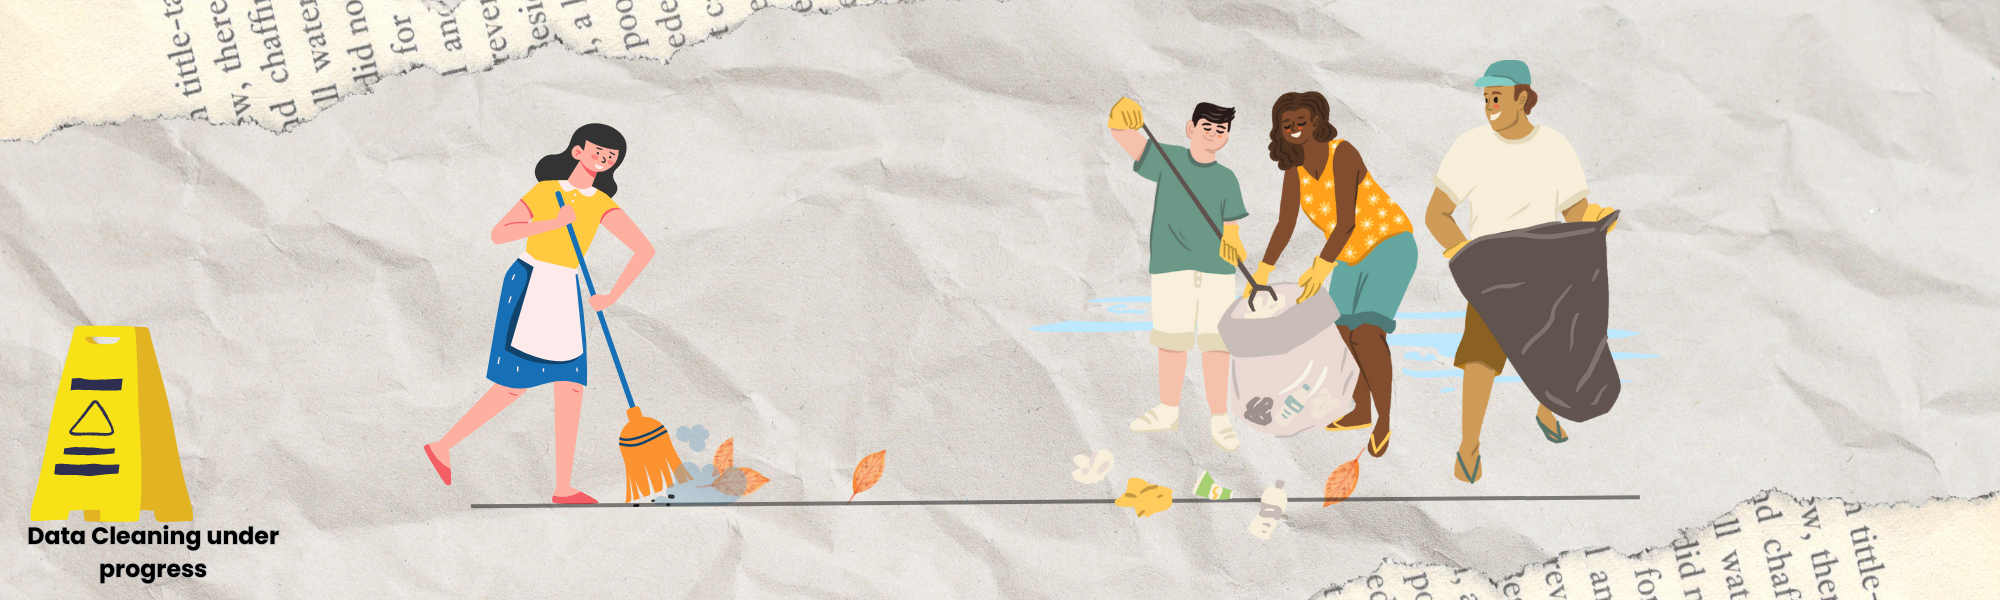**

**Filling Null Values in "host_location" column with "Not Shared"**





In [ ]:
dfs.fillna({'host_location': 'Not Shared'}, inplace= True)

<ipython-input-113-9e61c7714ac6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs.fillna({'host_location': 'Not Shared'}, inplace= True)


In [ ]:
dfs.host_response_time.value_counts()

within an hour        19024
within a few hours     3317
within a day           1478
a few days or more      277
Name: host_response_time, dtype: int64

In [ ]:
dfs.loc[dfs['host_response_time'].isna()].review_scores_communication.mean()

4.891491920330703

**We can see that response time having NAN values is having communication rating as 4.89, very close to 5.**

I am setting NAN values to **"within few hours".**

In [ ]:
dfs.fillna({'host_response_time':'within a few hours'}, inplace = True)

<ipython-input-116-b52942fb8daa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs.fillna({'host_response_time':'within a few hours'}, inplace = True)


In [ ]:
dfs.host_response_time.value_counts()

within an hour        19024
within a few hours     8639
within a day           1478
a few days or more      277
Name: host_response_time, dtype: int64

In [ ]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29418 entries, 1 to 42450
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   host_since                                    29418 non-null  datetime64[ns]
 1   host_location                                 29418 non-null  object        
 2   host_response_time                            29418 non-null  object        
 3   host_response_rate                            24096 non-null  float64       
 4   host_acceptance_rate                          25206 non-null  float64       
 5   host_is_superhost                             29355 non-null  object        
 6   host_listings_count                           29418 non-null  float64       
 7   host_total_listings_count                     29418 non-null  float64       
 8   host_verifications                            29418 non-null  obje

**.info()** is a great function which pandas can offer, this highlights the amountof missing values, data types for each column.

*  Checking distinct values for Beds

In [ ]:
dfs['beds'].value_counts()

1.0     13312
2.0      7310
3.0      3776
4.0      2347
5.0      1150
6.0       595
7.0       258
8.0       158
9.0        67
10.0       28
11.0       18
12.0       14
16.0        8
13.0        7
14.0        4
15.0        3
17.0        2
18.0        2
19.0        2
24.0        1
20.0        1
Name: beds, dtype: int64

Creating additional column with name **avg_rating_overall** which is an average of ratings for different parameters such as cleanliness, location, communication, check-in etc.

In [ ]:
dfs['avg_rating_overall'] = dfs[['review_scores_rating','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']].mean(axis = 1, skipna= True)
dfs.head()

<ipython-input-120-03a869ea41ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['avg_rating_overall'] = dfs[['review_scores_rating','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']].mean(axis = 1, skipna= True)


,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,avg_rating_overall
1,2022-02-12,Not Shared,within an hour,1.0,1.00,t,4.0,5.0,['phone'],t,t,Pomona,34.04848,-117.76887,Private room in villa,Private room,2,1 shared bath,1.0,1.0,"[""Bed linens"", ""Wifi"", ""Carbon monoxide alarm""...",46,3,90,5,5.00,5.00,5.00,5.00,5.00,4.40,f,4,0,4,0,0.86,4.900000
2,2015-08-17,Not Shared,within an hour,1.0,0.86,f,15.0,22.0,"['email', 'phone']",t,t,Rancho Palos Verdes,33.73842,-118.39580,Private room in resort,Private room,3,1 bath,1.0,1.0,"[""Shared hot tub"", ""Wifi"", ""Refrigerator"", ""Gy...",408,3,29,53,4.92,4.94,4.96,4.96,4.92,4.83,f,10,5,5,0,0.64,4.921667
3,2018-08-09,"Rancho Palos Verdes, CA",within an hour,1.0,0.99,t,4.0,6.0,"['email', 'phone']",t,t,Rancho Palos Verdes,33.74842,-118.31100,Private room in home,Private room,2,1 shared bath,1.0,1.0,"[""Smoke alarm"", ""Freezer"", ""Shampoo"", ""Park vi...",80,2,1125,44,4.80,4.93,4.86,4.86,4.66,4.82,t,4,0,4,0,1.09,4.821667
4,2012-11-18,"Malibu, CA",within an hour,1.0,NaN,f,1.0,6.0,"['email', 'phone', 'work_email']",t,t,Malibu,34.03979,-118.86885,Entire home,Entire home/apt,8,2 baths,3.0,4.0,"[""Sonos sound system"", ""Central heating"", ""Smo...",2138,7,28,15,4.79,4.71,5.00,4.79,4.64,4.36,f,1,1,0,0,0.18,4.715000
5,2015-02-26,"Los Angeles, CA",within an hour,1.0,1.00,f,1.0,4.0,"['email', 'phone']",t,t,San Pedro,33.73928,-118.29911,Private room in home,Private room,1,1 shared bath,1.0,2.0,"[""Generic refrigerator"", ""Generic body soap"", ...",55,2,1125,3,5.00,5.00,5.00,5.00,5.00,5.00,f,1,0,1,0,3.00,5.000000


**Creating another column which is simply an index with unique value starting from 0 till the length of dataframe.**

*  **Numpy arange() function is used to achieve**

In [ ]:
dfs['indx'] = np.arange(0,len(dfs))

<ipython-input-121-ffd7bfdc198f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['indx'] = np.arange(0,len(dfs))


**Exploration Begins**

## **Do response rate affect super host title ?**

In [ ]:
# checking relation between response rate, superhost
dfs.groupby(['host_is_superhost','host_response_time'])['indx'].count()

host_is_superhost  host_response_time
f                  a few days or more     268
                   within a day          1120
                   within a few hours    6985
                   within an hour        9284
t                  a few days or more       9
                   within a day           358
                   within a few hours    1631
                   within an hour        9700
Name: indx, dtype: int64

**This means responding to guests requests within less time can be a good practice, however still there are other factors which affects super host title.**




In [ ]:
# Host acceptance rate = total requests accepted/ total requests received. 
dfs['host_acceptance_rate'].value_counts() # 1 being all requests accepted and 0 as no requests accepted.
#  dataset having values which are even l.

1.00    9844
0.99    2718
0.98    1470
0.97    1407
0.96     928
        ... 
0.08       2
0.34       1
0.11       1
0.06       1
0.07       1
Name: host_acceptance_rate, Length: 94, dtype: int64

## **Effect of being a verified host.**

In [ ]:
dfs.groupby(['host_is_superhost','host_verifications'])['indx'].count()

host_is_superhost  host_verifications              
f                  ['email', 'phone', 'work_email']     2257
                   ['email', 'phone']                  13722
                   ['email']                              20
                   ['phone', 'work_email']               180
                   ['phone']                            1476
                   []                                      2
t                  ['email', 'phone', 'work_email']     1619
                   ['email', 'phone']                   9484
                   ['email']                               1
                   ['phone', 'work_email']                30
                   ['phone']                             564
Name: indx, dtype: int64

*  **Hosts verification by phone and email is enough to build a trust with guests.**

## **Effect of Profile Picture of host on listing**


In [ ]:
dfs.host_has_profile_pic.value_counts()


t    29156
f      262
Name: host_has_profile_pic, dtype: int64

*  **Majority of host has a profile picture updated with their listing.**

## **Effect of Profile Picture on Superhost title.**


In [ ]:
dfs.groupby(['host_is_superhost','host_has_profile_pic'])['indx'].count()

host_is_superhost  host_has_profile_pic
f                  f                         201
                   t                       17456
t                  f                          59
                   t                       11639
Name: indx, dtype: int64

*  **Almost every superhost has a profile picture. Profile picture becomes a necessity as it generates a feeling of trust.**

## **Effect of host identity verification under Government ID**


In [ ]:
dfs.groupby(['host_is_superhost','host_identity_verified'])['indx'].count()

host_is_superhost  host_identity_verified
f                  f                          2329
                   t                         15328
t                  f                          1210
                   t                         10488
Name: indx, dtype: int64

It can be seen whether host is super host or not, majorly have their profile verified with government ID. 

This pretty much seems obvious to generate trust and trust drives business.

For example - It feels lot more safer to stay at bnb having a government verified host.



## **Average Rating of hosts who have their profile verified with Government ID**

In [ ]:
dfs.loc[dfs['host_identity_verified']== 't'].avg_rating_overall.mean()

4.815254557165861

*  **The average rating of a verified host is 4.81**





## **Retreiving Top 10 Locations where majority of Airbnb's are located**

In [ ]:
dfs.neighbourhood_cleansed.value_counts().head(10)

Long Beach         1278
Venice             1267
Hollywood          1062
Santa Monica       1016
West Hollywood      860
Downtown            677
Glendale            652
Beverly Hills       533
Hollywood Hills     528
Pasadena            501
Name: neighbourhood_cleansed, dtype: int64

Tip - This is not based on rating, it is based on the number of Airbnb around specific location.

--------------------------------------------------------------------------------
**Long beach, Venice, Hollywood, Santa Monica are top 4 locations, or it can be said that most Airbnb are located near these 4 places.**
 

## **Let's compare Average price near top and bootom locations.**


In [ ]:
dfs.loc[dfs['neighbourhood_cleansed'] == 'Long Beach'].price.max()

1495

* **Maximum price at Long Beach location is 1495 $ per night for entire home**

In [ ]:
dfs.loc[dfs['price'] == 1495]

,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,...,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,avg_rating_overall,indx
201,2014-11-29,"Beverly Hills, CA",within an hour,1.0,0.97,t,55.0,117.0,"['email', 'phone', 'work_email']",t,t,Malibu,34.025077,-118.767889,Entire home,Entire home/apt,4,2 baths,2.0,...,"[""Central heating"", ""Baby bath"", ""Washer"", ""Sm...",1495,2,365,6,5.00,5.00,5.0,5.00,5.00,5.00,f,55,53,2,0,1.54,5.000000,127
3793,2014-07-06,"Malibu, CA",within a day,1.0,0.57,f,1.0,1.0,"['email', 'phone']",t,t,Malibu,34.037880,-118.613840,Entire home,Entire home/apt,10,2.5 baths,4.0,...,"[""Smoke alarm"", ""Washer"", ""Shampoo"", ""Kitchen""...",1495,7,28,12,4.83,4.50,5.0,4.92,4.92,4.50,f,1,1,0,0,0.27,4.778333,2432
26362,2020-06-21,"Long Beach, CA",within a day,1.0,0.20,f,1.0,4.0,"['email', 'phone']",t,t,Long Beach,33.838560,-118.139130,Entire home,Entire home/apt,10,4 baths,5.0,...,"[""Gym"", ""Smoke alarm"", ""Washer"", ""Kitchen"", ""F...",1495,4,180,5,5.00,5.00,5.0,5.00,4.80,4.80,f,1,1,0,0,0.25,4.933333,18442
36677,2015-03-29,"Los Angeles, CA",within an hour,1.0,1.00,t,1.0,2.0,"['email', 'phone']",t,t,Topanga,34.045610,-118.570880,Entire home,Entire home/apt,5,2.5 baths,3.0,...,"[""Bay view"", ""120\"" TV with Apple TV, Hulu, Ne...",1495,6,29,32,5.00,4.97,5.0,5.00,4.91,4.78,t,1,1,0,0,1.24,4.943333,25685


## **Getting Locations which have least number of Airbnb's.**

In [ ]:
dfs.neighbourhood_cleansed.value_counts().tail(10)

Chatsworth Reservoir    2
Rancho Dominguez        2
Walnut Park             2
Sun Village             2
Lake View Terrace       2
Hasley Canyon           2
East Compton            2
Elizabeth Lake          1
Lopez/Kagel Canyons     1
Cudahy                  1
Name: neighbourhood_cleansed, dtype: int64

In [ ]:
dfs.loc[dfs['neighbourhood_cleansed'] == 'Cudahy'].price.max()

185

*  **The difference is obvious in price, here the maximum price/night went upto 185$.**
--------------------------------------------------------------------------------

Every host want to earn maximum with their Airbnb, thus for this Analysis, I will be more focussed on Top 10 Locations.

## **Relation between property type and price.**

--------------------------------------------------------------------------------
**Checking Top 10 Property types so as to maximise profits**


In [ ]:
dfs.property_type.value_counts().head(10)

Entire home                    7108
Entire rental unit             6678
Private room in home           4057
Entire guesthouse              2071
Entire condo                   1496
Entire guest suite             1217
Private room in rental unit    1212
Entire townhouse                585
Entire bungalow                 545
Entire villa                    495
Name: property_type, dtype: int64

**Finding Average cost of staying in Top 10 Property Types Per Night**

In [ ]:
a= ['Entire home','Entire rental unit','Private room in home','Entire guesthouse','Entire condo','Entire guest suite','Private room in rental unit','Entire townhouse','Entire bungalow','Entire villa']

for i in a :
  b = dfs.loc[dfs['property_type'] == i].price.mean()
  print(f"{i} on an average costs {b} \n")



Entire home on an average costs 419.5326392796849 

Entire rental unit on an average costs 181.12593590895477 

Private room in home on an average costs 87.96672418042888 

Entire guesthouse on an average costs 148.98213423466925 

Entire condo on an average costs 253.63368983957218 

Entire guest suite on an average costs 175.0706655710764 

Private room in rental unit on an average costs 95.46782178217822 

Entire townhouse on an average costs 270.95042735042733 

Entire bungalow on an average costs 212.5394495412844 

Entire villa on an average costs 1195.858585858586 



> **Findings-**



> *   Private Room in home has the lowest value, thus profits will depend upon number of private rooms.
> *   Villa Costs maximum.



Checking Room Types and their count

In [ ]:
dfs.room_type.value_counts()

Entire home/apt    21565
Private room        7448
Shared room          332
Hotel room            73
Name: room_type, dtype: int64

## **Average Accomodations under different room category.**

In [ ]:
dfs.groupby('room_type')['accommodates'].mean()

room_type
Entire home/apt    4.582101
Hotel room         2.383562
Private room       2.030478
Shared room        2.144578
Name: accommodates, dtype: float64

* **This gives a rough idea about accomodation arrangements for different room type.**

## **Getting an estimate on number of bedrooms in Top 10 Property Types**

In [ ]:
for i in a :
  b = dfs.loc[dfs['property_type'] == i].bedrooms.mean()
  c= np.ceil(b)
  print(f"{i} on an average have {c} bedrooms \n")



Entire home on an average have 3.0 bedrooms 

Entire rental unit on an average have 2.0 bedrooms 

Private room in home on an average have 2.0 bedrooms 

Entire guesthouse on an average have 2.0 bedrooms 

Entire condo on an average have 2.0 bedrooms 

Entire guest suite on an average have 2.0 bedrooms 

Private room in rental unit on an average have 2.0 bedrooms 

Entire townhouse on an average have 3.0 bedrooms 

Entire bungalow on an average have 2.0 bedrooms 

Entire villa on an average have 5.0 bedrooms 



## **Average number of accomodates in top 10 property types:**


In [ ]:
for i in a :
  b = dfs.loc[dfs['property_type'] == i].accommodates.mean()
  c= np.ceil(b)
  print(f"{i} on an average accomodates {c} guests \n")

Entire home on an average accomodates 7.0 guests 

Entire rental unit on an average accomodates 4.0 guests 

Private room in home on an average accomodates 3.0 guests 

Entire guesthouse on an average accomodates 3.0 guests 

Entire condo on an average accomodates 5.0 guests 

Entire guest suite on an average accomodates 3.0 guests 

Private room in rental unit on an average accomodates 2.0 guests 

Entire townhouse on an average accomodates 7.0 guests 

Entire bungalow on an average accomodates 4.0 guests 

Entire villa on an average accomodates 10.0 guests 



## **Average Number of bedrooms and beds in Top 10 property types.**

In [ ]:
for i in a :
  b = dfs.loc[dfs['property_type'] == i].bedrooms.mean()
  d= dfs.loc[dfs['property_type'] == i].beds.mean()
  c= np.ceil(b)
  e= np.ceil(d)
  print(f"{i} on an average have {c} bedrooms and {e} beds. \n")

Entire home on an average have 3.0 bedrooms and 4.0 beds. 

Entire rental unit on an average have 2.0 bedrooms and 2.0 beds. 

Private room in home on an average have 2.0 bedrooms and 2.0 beds. 

Entire guesthouse on an average have 2.0 bedrooms and 2.0 beds. 

Entire condo on an average have 2.0 bedrooms and 3.0 beds. 

Entire guest suite on an average have 2.0 bedrooms and 2.0 beds. 

Private room in rental unit on an average have 2.0 bedrooms and 2.0 beds. 

Entire townhouse on an average have 3.0 bedrooms and 4.0 beds. 

Entire bungalow on an average have 2.0 bedrooms and 3.0 beds. 

Entire villa on an average have 5.0 bedrooms and 5.0 beds. 



This gives an idea of how beds are managed with bedrooms in different Property types.

The result could help host in managing the **accomodation**.

## **Diving deep into beds offered by different Rooom Type**

In [ ]:
rooms = pd.unique(dfs['room_type'])
rooms

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

**Number of beds in different room type:**

In [ ]:
for i in rooms :
  b = dfs.loc[dfs['room_type'] == i].beds.mean()
  c= np.ceil(b)
 
  print(f"{i} on an average have {c} beds. \n")

Private room on an average have 2.0 beds. 

Entire home/apt on an average have 3.0 beds. 

Shared room on an average have 3.0 beds. 

Hotel room on an average have 2.0 beds. 



## Average price per room type

In [ ]:
dfs.groupby('room_type')['price'].mean()

room_type
Entire home/apt    290.030652
Hotel room         560.589041
Private room        98.398093
Shared room         87.412651
Name: price, dtype: float64

> Mean Prices seems to be fair, however they can fluctuate with respect to seasonality.




**I feel outliers in price is possible as a fluctuation during peak season when availaibility is low, prices tends to rise drastically.**

# **Analysis on reviews received**

In [ ]:
dfs[['number_of_reviews','review_scores_rating','reviews_per_month']].head(10)

,number_of_reviews,review_scores_rating,reviews_per_month
1,5,5.00,0.86
2,53,4.92,0.64
3,44,4.80,1.09
4,15,4.79,0.18
5,3,5.00,3.00
6,12,4.33,0.76
7,81,4.94,1.77
8,1,5.00,0.49
9,72,4.90,5.24
11,185,4.96,1.73


## **Average number of reviews every superhost have.**


In [ ]:
dfs.groupby('host_is_superhost')['number_of_reviews'].mean()


host_is_superhost
f    32.569349
t    70.026415
Name: number_of_reviews, dtype: float64

>  **On an Average every superhost have 70 reviews in total.**

## **Being a newby in the business, it is important to give more weightage to host profiles who joined the platform recently.**

## **Checking numnber of reviews on superhost who are in business since a year**


In [ ]:
dfs['host_since'].max()

# The latest host belongs to 3rd January 2023. I can check for average reviews superhost have on their profile who are in business since last 1 year, i.e. since 01-01-2022

Timestamp('2023-03-01 00:00:00')

> **The latest host belongs to 3rd January 2023. I can check for average reviews superhost have on their profile who are in business since last 1 year, i.e. since 01-01-2022**

Extracting Month from Host Since Column 

In [ ]:
dfs['host_since_month']= df['host_since'].dt.strftime('%m')

<ipython-input-147-4fee936040cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['host_since_month']= df['host_since'].dt.strftime('%m')


Extracting Year from Host Since Column 

In [ ]:
dfs['host_since_year']= df['host_since'].dt.strftime('%Y')

<ipython-input-148-70d7c8972ce1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['host_since_year']= df['host_since'].dt.strftime('%Y')


In [ ]:
pd.set_option('display.max_columns', 50)
dfs.head()

,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,avg_rating_overall,indx,host_since_month,host_since_year
1,2022-02-12,Not Shared,within an hour,1.0,1.00,t,4.0,5.0,['phone'],t,t,Pomona,34.04848,-117.76887,Private room in villa,Private room,2,1 shared bath,1.0,1.0,"[""Bed linens"", ""Wifi"", ""Carbon monoxide alarm""...",46,3,90,5,5.00,5.00,5.00,5.00,5.00,4.40,f,4,0,4,0,0.86,4.900000,0,02,2022
2,2015-08-17,Not Shared,within an hour,1.0,0.86,f,15.0,22.0,"['email', 'phone']",t,t,Rancho Palos Verdes,33.73842,-118.39580,Private room in resort,Private room,3,1 bath,1.0,1.0,"[""Shared hot tub"", ""Wifi"", ""Refrigerator"", ""Gy...",408,3,29,53,4.92,4.94,4.96,4.96,4.92,4.83,f,10,5,5,0,0.64,4.921667,1,08,2015
3,2018-08-09,"Rancho Palos Verdes, CA",within an hour,1.0,0.99,t,4.0,6.0,"['email', 'phone']",t,t,Rancho Palos Verdes,33.74842,-118.31100,Private room in home,Private room,2,1 shared bath,1.0,1.0,"[""Smoke alarm"", ""Freezer"", ""Shampoo"", ""Park vi...",80,2,1125,44,4.80,4.93,4.86,4.86,4.66,4.82,t,4,0,4,0,1.09,4.821667,2,08,2018
4,2012-11-18,"Malibu, CA",within an hour,1.0,NaN,f,1.0,6.0,"['email', 'phone', 'work_email']",t,t,Malibu,34.03979,-118.86885,Entire home,Entire home/apt,8,2 baths,3.0,4.0,"[""Sonos sound system"", ""Central heating"", ""Smo...",2138,7,28,15,4.79,4.71,5.00,4.79,4.64,4.36,f,1,1,0,0,0.18,4.715000,3,11,2012
5,2015-02-26,"Los Angeles, CA",within an hour,1.0,1.00,f,1.0,4.0,"['email', 'phone']",t,t,San Pedro,33.73928,-118.29911,Private room in home,Private room,1,1 shared bath,1.0,2.0,"[""Generic refrigerator"", ""Generic body soap"", ...",55,2,1125,3,5.00,5.00,5.00,5.00,5.00,5.00,f,1,0,1,0,3.00,5.000000,4,02,2015


In [ ]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29418 entries, 1 to 42450
Data columns (total 41 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   host_since                                    29418 non-null  datetime64[ns]
 1   host_location                                 29418 non-null  object        
 2   host_response_time                            29418 non-null  object        
 3   host_response_rate                            24096 non-null  float64       
 4   host_acceptance_rate                          25206 non-null  float64       
 5   host_is_superhost                             29355 non-null  object        
 6   host_listings_count                           29418 non-null  float64       
 7   host_total_listings_count                     29418 non-null  float64       
 8   host_verifications                            29418 non-null  obje

In [ ]:
pd.to_numeric(dfs['host_since_month'], errors = 'raise')

1         2
2         8
3         8
4        11
5         2
         ..
42446     7
42447     7
42448     7
42449    11
42450     5
Name: host_since_month, Length: 29418, dtype: int64

In [ ]:
pd.to_numeric(dfs['host_since_year'],errors = 'raise')

1        2022
2        2015
3        2018
4        2012
5        2015
         ... 
42446    2015
42447    2021
42448    2015
42449    2016
42450    2018
Name: host_since_year, Length: 29418, dtype: int64

##  **Average number of reviews with Superhosts who started from or after 01-2022**

In [ ]:
dfs.loc[(dfs['host_is_superhost']=='t') & (dfs['host_since'] >= '2022-01-01')]['number_of_reviews'].mean()

17.641104294478527

**Maximum survey earned by superhost who started in 2022**


In [ ]:
dfs.loc[(dfs['host_is_superhost']=='t') & (dfs['host_since'] >= '2022-01-01')]['number_of_reviews'].max()

97

> *  **That is a great number being in a business for only a year.**

### **Lets check what this superhost is offering :**

In [ ]:
dfs.loc[(dfs['number_of_reviews'] == 97) & (dfs['host_since'] >= '2022-01-01')]

,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,avg_rating_overall,indx,host_since_month,host_since_year
26520,2022-03-07,Not Shared,within an hour,1.0,1.0,t,3.0,3.0,['phone'],t,f,Lawndale,33.88151,-118.35468,Entire guesthouse,Entire home/apt,6,1 bath,2.0,4.0,"[""Ethernet connection"", ""Gas stove"", ""Central ...",160,1,365,97,4.92,4.94,4.99,4.9,4.78,4.86,f,3,2,1,0,7.99,4.898333,18551,03,2022


In [ ]:
pd.options.display.max_colwidth = 1000
dfs.loc[(dfs['number_of_reviews'] == 97) & (dfs['host_since'] >= '2022-01-01')]['amenities']

26520    ["Ethernet connection", "Gas stove", "Central heating", "Smoke alarm", "Shampoo", "Wine glasses", "Kitchen", "Hair dryer", "Free street parking", "Clothing storage: closet", "Ceiling fan", "Microwave", "Bed linens", "Wifi", "Conditioner", "Carbon monoxide alarm", "Room-darkening shades", "Bathtub", "Private entrance", "Pocket wifi", "Iron", "Air conditioning", "TV", "Coffee", "Refrigerator", "Single level home", "Dining table", "Coffee maker: drip coffee maker", "Essentials", "Blender", "Cleaning products", "Dishes and silverware", "Toaster", "Hot water", "Courtyard view", "Hangers", "Private patio or balcony", "Long term stays allowed", "Extra pillows and blankets", "Private backyard", "Free dryer \u2013 In unit", "Fire extinguisher", "Laundromat nearby", "Free washer \u2013 In unit", "Free driveway parking on premises \u2013 1 space", "Body soap", "Cooking basics", "Security cameras on property"]
Name: amenities, dtype: object

> **Amenities this host is offering gives a great insight, this can save unnessary spending on different items.**

**Thus offering best amenities and comfortable stay, the ideal reviews in return should be more than 40 with in a year if guests are treated well.**

 
# **Let's see the popularity of Airbnb business every year in the vicinity, ( This means number of hosts joining the platform every year could give an insight how the business apportunity is)**
 
  



In [ ]:
a = dfs.groupby('host_since_year')['indx'].count()
a


host_since_year
2008      11
2009      97
2010     302
2011     974
2012    1555
2013    2505
2014    3204
2015    3671
2016    4194
2017    3021
2018    2434
2019    2384
2020    1348
2021    1850
2022    1757
2023     111
Name: indx, dtype: int64

In [ ]:
b= pd.unique(dfs['host_since_year'])
type(a), type(b)

(pandas.core.series.Series, numpy.ndarray)

#### **To visualize this trend I need create a dataframe which similar result set, and that will be done by creating separate series of distinct years and grouped result.**

Later both the series will be merged using concat operation.

In [ ]:
c= a.to_numpy()

In [ ]:
c

array([  11,   97,  302,  974, 1555, 2505, 3204, 3671, 4194, 3021, 2434,
       2384, 1348, 1850, 1757,  111])

In [ ]:
d= np.sort(b)
d

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [ ]:
type(c), type(b)

(numpy.ndarray, numpy.ndarray)

In [ ]:
num_host= pd.Series(c, index = np.arange(0, len(c)))
num_host

0       11
1       97
2      302
3      974
4     1555
5     2505
6     3204
7     3671
8     4194
9     3021
10    2434
11    2384
12    1348
13    1850
14    1757
15     111
dtype: int64

In [ ]:
year_distinct = pd.Series(d, index = np.arange(0,len(d)))
year_distinct

0     2008
1     2009
2     2010
3     2011
4     2012
5     2013
6     2014
7     2015
8     2016
9     2017
10    2018
11    2019
12    2020
13    2021
14    2022
15    2023
dtype: object

In [ ]:
type(num_host), type(year_distinct)

(pandas.core.series.Series, pandas.core.series.Series)

In [ ]:
host_vs_year= pd.concat([year_distinct,num_host], axis = 1)
host_vs_year

,0,1
0,2008,11
1,2009,97
2,2010,302
3,2011,974
4,2012,1555
5,2013,2505
6,2014,3204
7,2015,3671
8,2016,4194
9,2017,3021


In [ ]:
type(host_vs_year)

pandas.core.frame.DataFrame

## **Importing Library to visualize the pattern**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline



*   Setting figure size
*   Giving X and Y lable
*   Providing Title to the Graph
*   Plotting the graph



<Axes: title={'center': 'Total Hosts Joined Airbnb Platform Yearly'}, xlabel='Years', ylabel='Total hosts'>

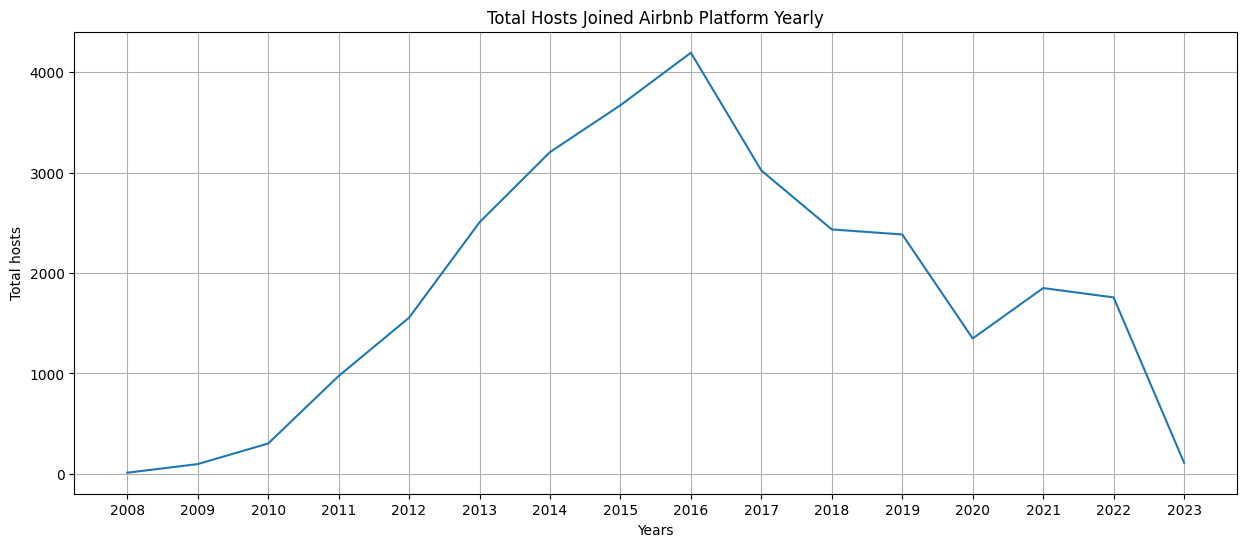

In [ ]:
plt.figure(figsize= (15,6))
plt.xlabel('Years')
plt.ylabel('Total hosts')
plt.grid()
plt.title('Total Hosts Joined Airbnb Platform Yearly')
sns.lineplot(data= host_vs_year, x=0, y=1)


## **Years from 2012 - 2016 saw highest number of hosts in business. This Data only contains hosts who are above 3.5 rating. Thus it is important to offer good service to be in the business for long.**



> **The graph should only be considered till 2022, there is no such steap decline in 2023.**
>   **The Year has just started and Host Count is in progress**



# **Exploring Ratings received for different parameters**

## **Let's Plot graph for Clealiness Rating Vs Comunication Ratings**
--------------------------------------------------------------------------------
> * **Communication ratings depend upon how well the communication was between host and guest from booking till check out**

<Axes: title={'center': 'Trend between reviews for Cleanliness and Communication with host'}, xlabel='review_scores_communication', ylabel='review_scores_cleanliness'>

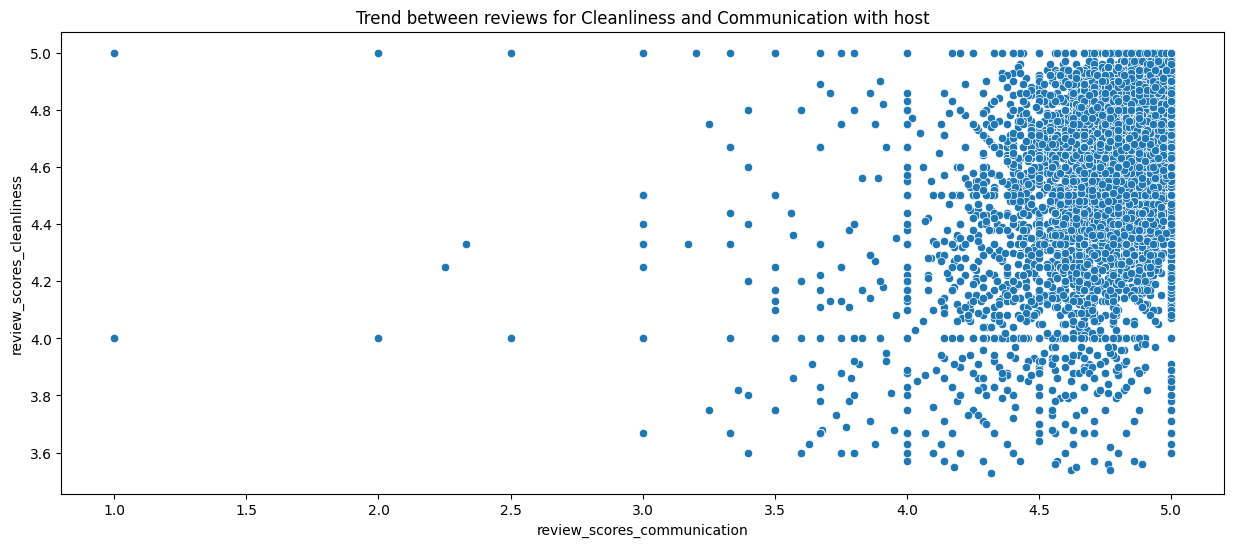

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Trend between reviews for Cleanliness and Communication with host')
sns.scatterplot(data = dfs ,y= 'review_scores_cleanliness', x = 'review_scores_communication')

> **Most hosts care about the ratings very much to run their business smoothly.**
> More than **80%** hosts are about **4.5** rating in cleanliness and maintaining good communication with guests.

# **Graph 2: Cleanliness Ratings Vs Checkin Procedure Ratings**

<Axes: title={'center': 'Trend between reviews fpor Cleanliness and Checkin procedure by host'}, xlabel='review_scores_checkin', ylabel='review_scores_cleanliness'>

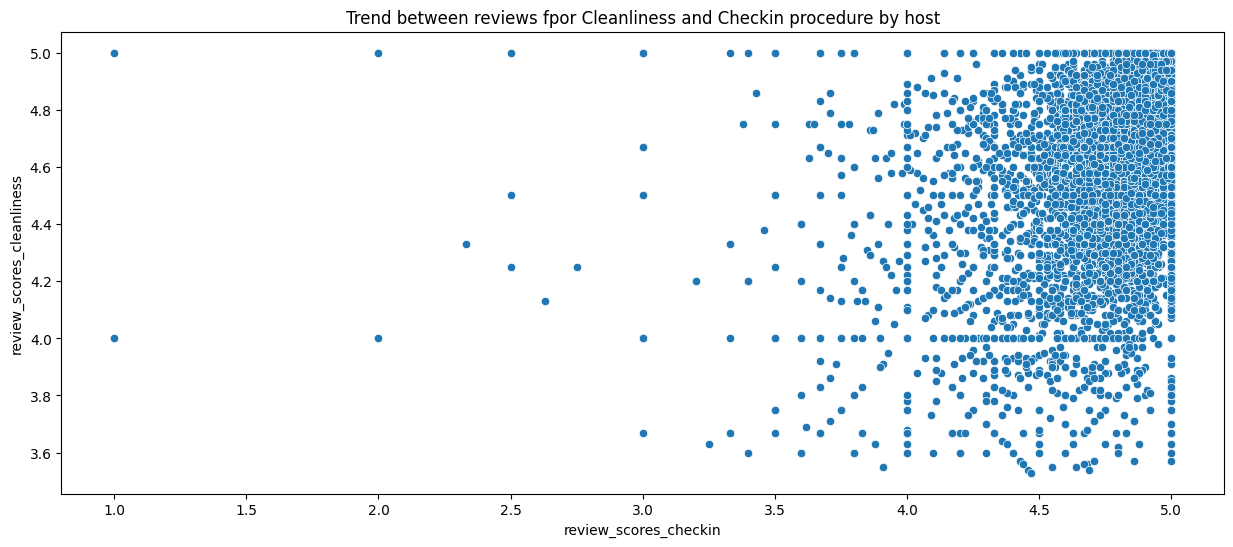

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Trend between reviews fpor Cleanliness and Checkin procedure by host')
sns.scatterplot(data = dfs ,y= 'review_scores_cleanliness', x = 'review_scores_checkin')

### **For checkin most ratings lies on the extreme right side of the graph, almost 98% hosts have ratings above 4**

# **Graph 3: Location Rating Vs Price Offered**

<Axes: title={'center': 'Trend between reviews for Location and Value offered by host'}, xlabel='review_scores_value', ylabel='review_scores_location'>

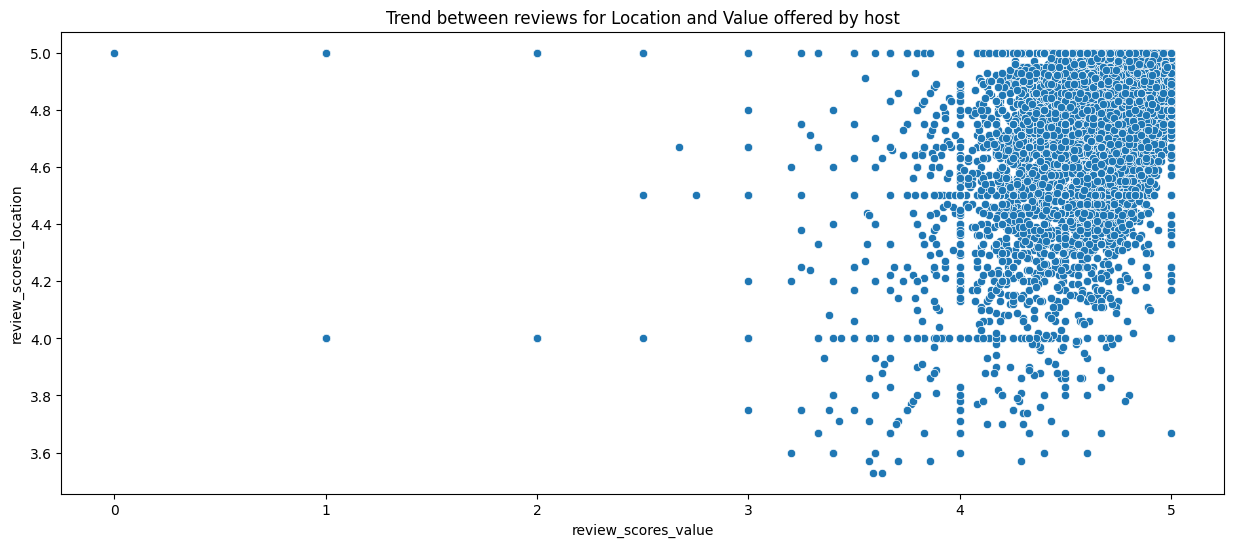

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Trend between reviews for Location and Value offered by host')
sns.scatterplot(data = dfs ,y= 'review_scores_location', x = 'review_scores_value')

> This Graph shows that - 
> *  **More than 90% guests says that the value offered by host for the place was in tune with the location.**

> *  **4 still remains the threshold and above 95% hosts offer valid price**



# **This section include efforts of trial to create a relation between different entities in dataset**

In [ ]:
dfs.instant_bookable.value_counts()

f    22106
t     7312
Name: instant_bookable, dtype: int64

Availability is a good thing for guests but not for hosts. Every Host want that there should be a housefull each day.

So Whenever changes in availaibility occurs, it should be updated on portal immediately as a good practice and avoid any confusion for guests.

> **Tip- This do not conclude anything as availaibility do not affect any variable involved in making hosts a superhost.**

 



## **Reviews on an average per Month received**
 
 



In [ ]:
# Reviews / month
dfs.groupby('host_is_superhost')['reviews_per_month'].mean()

host_is_superhost
f    1.138019
t    2.035901
Name: reviews_per_month, dtype: float64

In [ ]:
# Reviews / month for last 2 years
last_2_year = dfs.loc[dfs['host_since_year']>= '2021']
last_2_year.groupby(['host_since_year','host_since_month'])['reviews_per_month'].sum()

host_since_year  host_since_month
2021             01                  238.47
                 02                  211.35
                 03                  309.61
                 04                  224.43
                 05                  258.26
                 06                  401.06
                 07                  399.89
                 08                  461.20
                 09                  283.02
                 10                  275.83
                 11                  403.51
                 12                  286.81
2022             01                  267.13
                 02                  289.99
                 03                  295.63
                 04                  296.86
                 05                  298.78
                 06                  442.05
                 07                  300.41
                 08                  334.95
                 09                  375.28
                 10                  312.3

## Let's See Which month is favriote for hosts to join the platform.

> This gives a pretty good idea when demand rises and more Airbnb's as required, which means the part of year when visitor count rises.


In [ ]:
dfs.groupby('host_since_month')['indx'].count()


host_since_month
01    2182
02    2143
03    2278
04    2331
05    2618
06    2850
07    2784
08    2759
09    2334
10    2382
11    2450
12    2307
Name: indx, dtype: int64

In [ ]:

to = np.array(dfs.groupby('host_since_month')['indx'].count())
to

array([2182, 2143, 2278, 2331, 2618, 2850, 2784, 2759, 2334, 2382, 2450,
       2307])

In [ ]:
mo = np.sort(pd.unique(dfs['host_since_month']))
mo

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [ ]:
df_mon = pd.DataFrame({'total_host':to,'month':mo})
df_mon

,total_host,month
0,2182,01
1,2143,02
2,2278,03
3,2331,04
4,2618,05
5,2850,06
6,2784,07
7,2759,08
8,2334,09
9,2382,10


# **Graph: Host joined platform by Month**

<Axes: title={'center': 'Total host by month'}, xlabel='month', ylabel='total_host'>

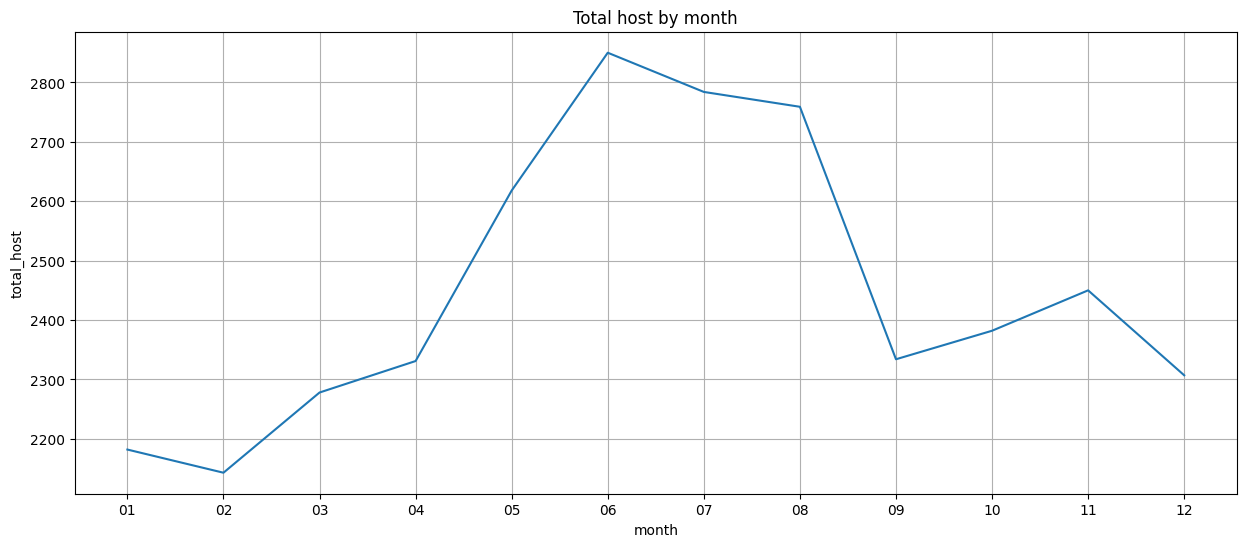

In [ ]:
plt.figure(figsize= (15,6))
plt.title('Total host by month')
plt.grid()
sns.lineplot(data = df_mon, x= 'month', y = 'total_host')

> **May- August month noticed favriote time to onboard the platform**
> * **May till August experience high count of visitors**

# **BUSINESS HEALTH**

> **Trying to find number of listings made by hosts who joined platform in 2022.**

In [ ]:
dfs.loc[dfs['host_since_year'] >= '2022'].calculated_host_listings_count.max()


109

In [ ]:
dfs.drop_duplicates(inplace = True)

<ipython-input-181-984e04b24fed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs.drop_duplicates(inplace = True)


In [ ]:
dfs.loc[dfs['calculated_host_listings_count']== 109]

,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,avg_rating_overall,indx,host_since_month,host_since_year
33310,2022-06-14,"Los Angeles, CA",within an hour,1.0,1.0,t,109.0,114.0,"['email', 'phone']",t,t,Sherman Oaks,34.16218,-118.45448,Private room in home,Private room,3,2.5 baths,1.0,2.0,"[""Pool table"", ""Smoke alarm"", ""Washer"", ""Kitch...",79,30,365,1,5.0,5.0,5.0,5.0,5.0,5.0,t,109,0,109,0,0.13,5.0,23435,06,2022
35132,2022-06-14,"Los Angeles, CA",within an hour,1.0,1.0,t,109.0,114.0,"['email', 'phone']",t,t,Sherman Oaks,34.16303,-118.45665,Private room in home,Private room,4,2.5 baths,1.0,2.0,"[""Pool table"", ""Smoke alarm"", ""Washer"", ""Kitch...",99,30,365,1,5.0,5.0,5.0,5.0,5.0,5.0,t,109,0,109,0,0.19,5.0,24705,06,2022
36399,2022-06-14,"Los Angeles, CA",within an hour,1.0,1.0,t,109.0,114.0,"['email', 'phone']",t,t,Sherman Oaks,34.16227,-118.45673,Private room in home,Private room,3,2.5 baths,1.0,2.0,"[""Pool table"", ""Smoke alarm"", ""Washer"", ""Kitch...",79,30,365,1,5.0,5.0,5.0,5.0,5.0,5.0,t,109,0,109,0,0.17,5.0,25496,06,2022


The records differs from each other in location coordinates, The hosts joined platform in June 2022.

> Keeping this in mind, within 8 months property was listed 109 times, that is more than 3 months host was in business.

> Considering duration of stay, the listings shows good business opportunity.

> It is good to track the amenities for this host.

> #  **Conclusion**

**During the EDA 3 core areas were identified which are necessary to understand in order to become a successful host and earn high profits.** 

> *  Host traits
> *  Property Analysis
> *  Metrics (Ratings) Analysis


**It is expected to see high ROI within a year if importance to each area is given**




 ## **Host Traits**

> * Response time - **With In An Hour** found to be the best practice.
--------------------------------------------------------------------------------
> * Host Profile Verification Using - **Email and Phone** is more than enough.
--------------------------------------------------------------------------------
> * Host Identity Verification - **Using Government ID**, It acts as a catalyst in generating a trust factor among guests looking at profile and has a power to compete against highly popular hosts.
--------------------------------------------------------------------------------
> * Host Profile Picture - It is must to have a recently updated profile picture.
--------------------------------------------------------------------------------

>
**Areas To be Well Maintained -**

> Cleanliness

> Communication

> Easy and Fast Checkin Procedure

> Price

> ## **Property Analysis**

 ### **Top 10 Locations for best price** - 
> Long Beach          
> Venice              
> Hollywood           
> Santa Monica        
> West Hollywood       
Downtown             
Glendale             
Beverly Hills        
Hollywood Hills      
Pasadena


--------------------------------------------------------------------------------

### **Max price/night for Entire home - 1495 $**

 **Top 10 Property Types**   
                                
> Entire home                                                  
> Entire rental unit        
> Private room in home            
Entire guesthouse               
Entire condo                    
Entire guest suite              
Private room in rental unit     
Entire townhouse                 
Entire bungalow                  
Entire villa 

**Average Rates** 

> Entire home on an average costs 419.5326392796849 

> Entire rental unit on an average costs 181.12593590895477 

> Private room in home on an average costs 87.96672418042888 

> Entire guesthouse on an average costs 148.98213423466925 

> Entire condo on an average costs 253.63368983957218 

> Entire guest suite on an average costs 175.0706655710764 

> Private room in rental unit on an average costs 95.46782178217822 

> Entire townhouse on an average costs 270.95042735042733 

> Entire bungalow on an average costs 212.5394495412844 

> Entire villa on an average costs 1195.858585858586 


**Private Room in home has the lowest value, thus profits will depend upon number of private rooms.**

**Villa Costs maximum at an average rate of almost 1200 $.**

--------------------------------------------------------------------------------

### **Average Bedrooms & Beds in Top 10 Property Types**

> Entire home on an average have 3.0 bedrooms and 4.0 beds. 

> Entire rental unit on an average have 2.0 bedrooms and 2.0 beds. 

> Private room in home on an average have 2.0 bedrooms and 2.0 beds. 

> Entire guesthouse on an average have 2.0 bedrooms and 2.0 beds. 

> Entire condo on an average have 2.0 bedrooms and 3.0 beds. 

> Entire guest suite on an average have 2.0 bedrooms and 2.0 beds. 

> Private room in rental unit on an average have 2.0 bedrooms and 2.0 beds. 

> Entire townhouse on an average have 3.0 bedrooms and 4.0 beds. 

> Entire bungalow on an average have 2.0 bedrooms and 3.0 beds. 

> Entire villa on an average have 5.0 bedrooms and 5.0 beds. 



**This gives an idea of how beds are managed with bedrooms in different Property types & will help in managing accomodation.**

--------------------------------------------------------------------------------

>
### **Room Types & Average number of Beds**

> Private room on an average have 2.0 beds. 

> Entire home/apt on an average have 3.0 beds. 

> Shared room on an average have 3.0 beds. 

> Hotel room on an average have 2.0 beds. 

## **Reviews Analysis**

Average Reviews on Profiles - **70**

Avg Reviews for host who joined Airbnb within a year - **(Host since 01-01-2022)**
> Average - **17**

> Max - **97**


Amenities Offered By Host who received 97 reviews in less than a Year - 

"Ethernet connection", "Gas stove", "Central heating", "Smoke alarm", "Shampoo", "Wine glasses", "Kitchen", "Hair dryer", "Free street parking", "Clothing storage: closet", "Ceiling fan", "Microwave", "Bed linens", "Wifi", "Conditioner", "Carbon monoxide alarm", "Room-darkening shades", "Bathtub", "Private entrance", "Pocket wifi", "Iron", "Air conditioning", "TV", "Coffee", "Refrigerator", "Single level home", "Dining table", "Coffee maker: drip coffee maker", "Essentials", "Blender", "Cleaning products", "Dishes and silverware", "Toaster", "Hot water", "Courtyard view", "Hangers", "Private patio or balcony", "Long term stays allowed", "Extra pillows and blankets", "Private backyard", "Free dryer \u2013 In unit", "Fire extinguisher", "Laundromat nearby", "Free washer \u2013 In unit", "Free driveway parking on premises", "Body soap", "Cooking basics", "Security cameras on property

--------------------------------------------------------------------------------

### **Ideal Review Targets -**

Monthly - 4


With in a Year - More than 40


--------------------------------------------------------------------------------




## **With this, I conclude my analysis with all the findings necesary to share with stakeholders.**

During the EDA I have tried, learnt and brushed up differnt skills such as 

Data Pre Processing which includes **Handling missing values**, **Improper Data Types**, **Outliers**.


**Powerfull use of Numpy, Pandas, Seaborn & Matplotlib.**

**Extracting Important attributes from raw data.**


I welcome the opportunity to share feedback based on your approach towards this project of mine.

> **Sourabh Kumar**